# **Support Vector Machine**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

In [ ]:
dementia = pd.read_csv('/content/drive/MyDrive/dementia_dataset.csv')

In [ ]:
dementia.shape

(373, 15)

In [ ]:
dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
dementia.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
dementia.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
dementia['SES'].fillna(0)

0      2.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
368    1.0
369    1.0
370    2.0
371    2.0
372    2.0
Name: SES, Length: 373, dtype: float64

In [ ]:
dementia['MMSE'].fillna(0)

0      27.0
1      30.0
2      23.0
3      28.0
4      22.0
       ... 
368    28.0
369    26.0
370    30.0
371    30.0
372    30.0
Name: MMSE, Length: 373, dtype: float64

In [ ]:
dementia = dementia.rename(columns = {'M/F' : 'Gender'})

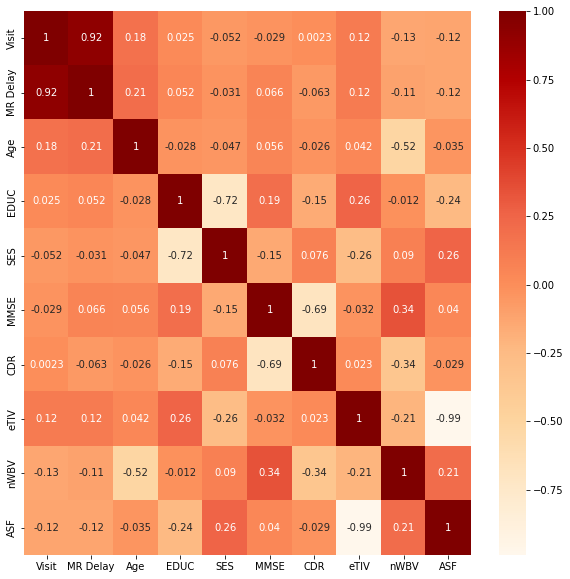

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(dementia.corr(), annot = True, cmap = 'OrRd')

In [ ]:
df = dementia[['eTIV', 'nWBV', 'ASF', 'CDR', 'Group']]
df.head()

,eTIV,nWBV,ASF,CDR,Group
0,1987,0.696,0.883,0.0,Nondemented
1,2004,0.681,0.876,0.0,Nondemented
2,1678,0.736,1.046,0.5,Demented
3,1738,0.713,1.010,0.5,Demented
4,1698,0.701,1.034,0.5,Demented


In [ ]:
Demented = df[df['CDR'] == 0.5]
NonDemented = df[df['CDR'] == 0.0]

In [ ]:
df.Group[df.Group == 'Nondemented'] = 1
df.Group[df.Group == 'Demented'] = 2
df.Group[df.Group == 'Converted'] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/pytho

In [ ]:
df['Group'] = df['Group'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X = df.drop('Group', axis = 1)
y = df['Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(261, 4)
(261,)
(112, 4)
(112,)


In [ ]:
svm = SVC(kernel = 'linear', gamma = 'auto', C = 5)
svm.fit(X_train, y_train)
print(svm)

SVC(C=5, gamma='auto', kernel='linear')


In [ ]:
y_pred = svm.predict(X_test)
print(y_pred)

[1 1 1 1 2 2 1 2 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 2 1 1
 1 2 1 1 1 1 1 2 2 1 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2 2 1 1
 1 2 2 2 1 2 1 1 2 1 2 1 2 1 1 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 2 1 2 2 2 1
 1]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')

Accuracy Score :  0.8928571428571429
Percentage :  89 %


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('Root Mean Squared Error : ', rmse)

Root Mean Squared Error :  0.5428101483418094


In [ ]:
matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
print(matrix)

Predicted   1   2
Actual           
1          60   0
2           0  40
3           7   5


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.90      1.00      0.94        60
           2       0.89      1.00      0.94        40
           3       0.00      0.00      0.00        12

    accuracy                           0.89       112
   macro avg       0.59      0.67      0.63       112
weighted avg       0.80      0.89      0.84       112



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Conclusion**

*   In comparison to other classifiers such as logistic regression and decision trees, SVM has a very high accuracy. It is well-known for its nonlinear input space kernel trick. To differentiate various classes, SVM creates a hyperplane in multidimensional space. SVM iteratively generates the best hyperplane, which is then utilised to minimise an error. The goal of SVM is to find a maximum marginal hyperplane (MMH) that splits a dataset into classes as evenly as possible. 


*   Accuracy for prediction of dementia is found to be 89%

